In [3]:
dataset_url_list = ["https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-42/detailed-bidirectional-flow-labels/capture20110810.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-43/detailed-bidirectional-flow-labels/capture20110811.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-44/detailed-bidirectional-flow-labels/capture20110812.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-45/detailed-bidirectional-flow-labels/capture20110815.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-46/detailed-bidirectional-flow-labels/capture20110815-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-47/detailed-bidirectional-flow-labels/capture20110816.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-48/detailed-bidirectional-flow-labels/capture20110816-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-49/detailed-bidirectional-flow-labels/capture20110816-3.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-50/detailed-bidirectional-flow-labels/capture20110817.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-51/detailed-bidirectional-flow-labels/capture20110818.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-52/detailed-bidirectional-flow-labels/capture20110818-2.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-53/detailed-bidirectional-flow-labels/capture20110819.binetflow",
                    "https://mcfp.felk.cvut.cz/publicDatasets/CTU-Malware-Capture-Botnet-54/detailed-bidirectional-flow-labels/capture20110815-3.binetflow"]

In [4]:
import pandas as pd
from tqdm import tqdm

final_df = pd.DataFrame()
for url in tqdm(dataset_url_list):
    df = pd.read_csv(url)
    final_df = pd.concat([final_df, df])

final_df.to_csv("ctu_13_data.csv", index=False)
del final_df

100%|██████████| 13/13 [05:56<00:00, 27.44s/it]


In [5]:
!pip install scikit-plot scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,flow=Background-UDP-Established
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,flow=Background-UDP-Established
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,flow=Background
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,flow=Background
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,flow=Background-UDP-Established


In [7]:
# df['SrcAddr'] = np.random.permutation(df['SrcAddr'])
# df['Sport'] = np.random.permutation(df['Sport'])

# Function to randomize IP address
# def randomize_ip():
#     return f"{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}.{np.random.randint(0, 256)}"

# # Function to randomize port
# def randomize_port():
#     return np.random.randint(1024, 65536)  # Registered and dynamic ports

# # Apply randomization
# data['SrcAddr'] = data['SrcAddr'].apply(lambda x: randomize_ip())
# data['Sport'] = data['Sport'].apply(lambda x: randomize_port())

In [8]:
data.shape

(19976700, 15)

In [9]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'sTos', 'dTos', 'TotPkts', 'TotBytes', 'SrcBytes',
       'Label'],
      dtype='object')

In [10]:
data['Label'].unique()

array(['flow=Background-UDP-Established', 'flow=Background',
       'flow=Background-Established-cmpgw-CVUT', ...,
       'flow=From-Botnet-V54-TCP-Established-HTTP-Ad-43',
       'flow=From-Botnet-V54-TCP-Established-HTTP-Ad-49',
       'flow=From-Normal-V54-Jist'], dtype=object)

In [11]:
def convertlabel(sample_data):
    if "botnet" in sample_data.lower():
        return 1
    else:
        return 0

data['Label'] = data['Label'].apply(lambda x:convertlabel(x))

In [12]:
data['Label'].value_counts()

,count
Label,
0,19532001
1,444699


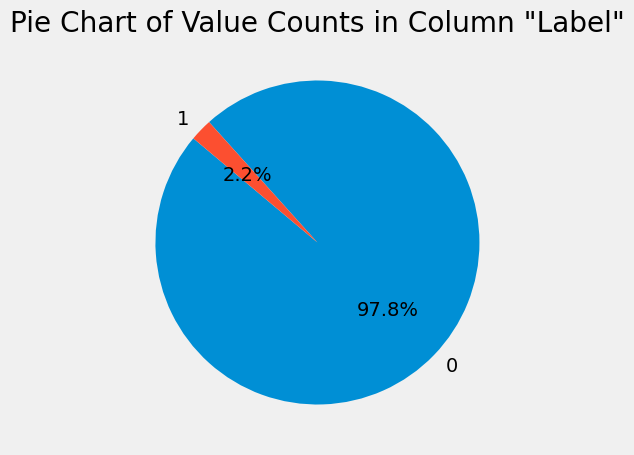

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [14]:
th = 1000
data1 = data[data['Label'] == 0].head(th)
data2 = data[data['Label'] == 1].head(th)

data = pd.concat([data1,data2])
data.shape

(2000, 15)

In [15]:
data['Label'].value_counts()

,count
Label,
0,1000
1,1000


In [16]:
data.to_csv('/content/ctu_13_sample_data.csv', index=False)

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/ctu_13_sample_data.csv')
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


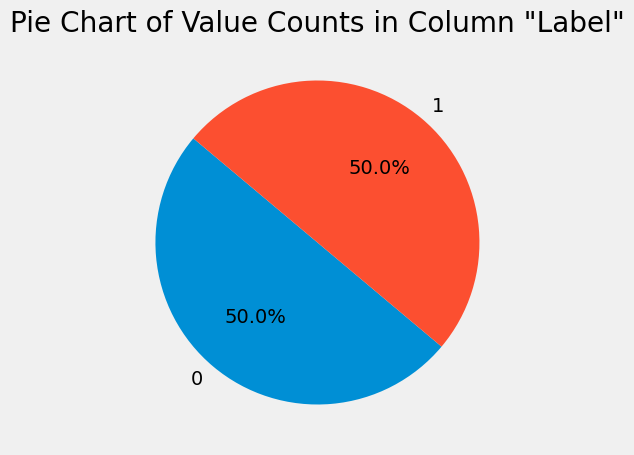

In [53]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

label_col_name = 'Label'
value_counts = data[label_col_name].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Pie Chart of Value Counts in Column \"{label_col_name}\"')
plt.grid()
plt.show()

In [54]:
data.dtypes

,0
StartTime,object
Dur,float64
Proto,object
SrcAddr,object
Sport,object
Dir,object
DstAddr,object
Dport,object
State,object
sTos,float64


In [55]:
data.isna().mean() * 100

,0
StartTime,0.00
Dur,0.00
Proto,0.00
SrcAddr,0.00
Sport,0.20
Dir,0.00
DstAddr,0.00
Dport,0.20
State,0.00
sTos,0.15


In [56]:
data = data[pd.to_numeric(data['Sport'], errors='coerce').notnull()]
data['Sport'] = pd.to_numeric(data['Sport'])
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [57]:
data = data[pd.to_numeric(data['Dport'], errors='coerce').notnull()]
data['Dport'] = pd.to_numeric(data['Dport'])
data.isna().mean() * 100

,0
StartTime,0.000000
Dur,0.000000
Proto,0.000000
SrcAddr,0.000000
Sport,0.000000
Dir,0.000000
DstAddr,0.000000
Dport,0.000000
State,0.000000
sTos,0.000000


In [58]:
data = data.fillna(value=0.0)
data.isna().mean() * 100

,0
StartTime,0.0
Dur,0.0
Proto,0.0
SrcAddr,0.0
Sport,0.0
Dir,0.0
DstAddr,0.0
Dport,0.0
State,0.0
sTos,0.0


In [59]:
data.describe()

,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
count,1978.000000,1978.000000,1978.000000,1978.0,1978.0,1978.000000,1.978000e+03,1.978000e+03,1978.000000
mean,660.744736,16429.134479,7829.098584,0.0,0.0,279.446411,2.001482e+05,1.838824e+05,0.505561
std,1253.268513,21031.950043,14083.625647,0.0,0.0,4424.790783,3.928018e+06,3.826686e+06,0.500096
min,0.000000,1.000000,20.000000,0.0,0.0,1.000000,6.000000e+01,6.000000e+01,0.000000
25%,0.301484,1538.250000,53.000000,0.0,0.0,2.000000,1.860000e+02,1.240000e+02,0.000000
50%,9.012479,2035.500000,85.000000,0.0,0.0,3.000000,2.930000e+02,1.860000e+02,1.000000
75%,189.202762,33912.000000,13363.000000,0.0,0.0,11.000000,1.596000e+03,8.202500e+02,1.000000
max,3599.995117,65282.000000,65520.000000,0.0,0.0,162760.000000,1.371365e+08,1.328164e+08,1.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   StartTime  1978 non-null   object 
 1   Dur        1978 non-null   float64
 2   Proto      1978 non-null   object 
 3   SrcAddr    1978 non-null   object 
 4   Sport      1978 non-null   int64  
 5   Dir        1978 non-null   object 
 6   DstAddr    1978 non-null   object 
 7   Dport      1978 non-null   int64  
 8   State      1978 non-null   object 
 9   sTos       1978 non-null   float64
 10  dTos       1978 non-null   float64
 11  TotPkts    1978 non-null   int64  
 12  TotBytes   1978 non-null   int64  
 13  SrcBytes   1978 non-null   int64  
 14  Label      1978 non-null   int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 247.2+ KB


In [61]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,0.0,0.0,12,875,413,0
1,2011/08/10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,0.0,0.0,2,135,75,0
2,2011/08/10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,0.0,0.0,2,120,60,0
3,2011/08/10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,0.0,0.0,3,180,120,0
4,2011/08/10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,0.0,0.0,42,2856,1596,0


In [62]:
data['Proto'].value_counts()

,count
Proto,
tcp,1182
udp,790
rtp,5
rtcp,1


In [63]:
data['Dir'].value_counts()

,count
Dir,
->,1020
<->,730
<?>,208
?>,20


In [64]:
data['State'].value_counts()

,count
State,
CON,730
S_,619
FSPA_FSPA,115
PA_PA,89
INT,66
...,...
RA_A,1
FA_R,1
FSPA_SA,1


In [65]:
data.isna().sum().sum()

0

In [66]:
data.duplicated().sum()

0

In [67]:
data['StartTime'] = pd.to_datetime(data['StartTime'])
data['Hour'] = data['StartTime'].dt.hour
data['Minute'] = data['StartTime'].dt.minute
data['Second'] = data['StartTime'].dt.second
data['DayOfWeek'] = data['StartTime'].dt.dayofweek
data['Day'] = data['StartTime'].dt.day

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StartTime  1978 non-null   datetime64[ns]
 1   Dur        1978 non-null   float64       
 2   Proto      1978 non-null   object        
 3   SrcAddr    1978 non-null   object        
 4   Sport      1978 non-null   int64         
 5   Dir        1978 non-null   object        
 6   DstAddr    1978 non-null   object        
 7   Dport      1978 non-null   int64         
 8   State      1978 non-null   object        
 9   sTos       1978 non-null   float64       
 10  dTos       1978 non-null   float64       
 11  TotPkts    1978 non-null   int64         
 12  TotBytes   1978 non-null   int64         
 13  SrcBytes   1978 non-null   int64         
 14  Label      1978 non-null   int64         
 15  Hour       1978 non-null   int32         
 16  Minute     1978 non-null   int32         
 17  

In [69]:
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']
numerical_columns = [col for col in data.columns if col not in categorical_columns]

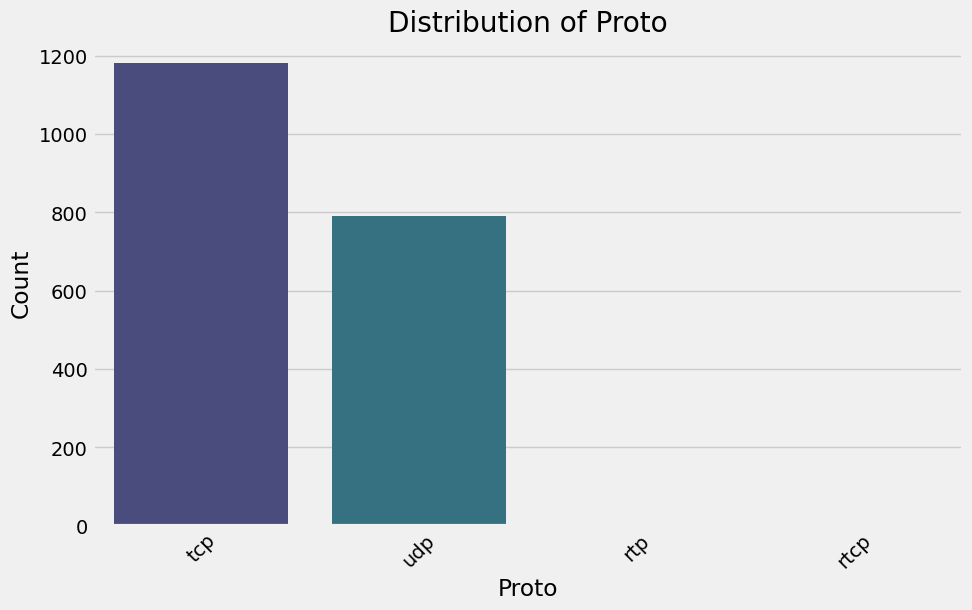

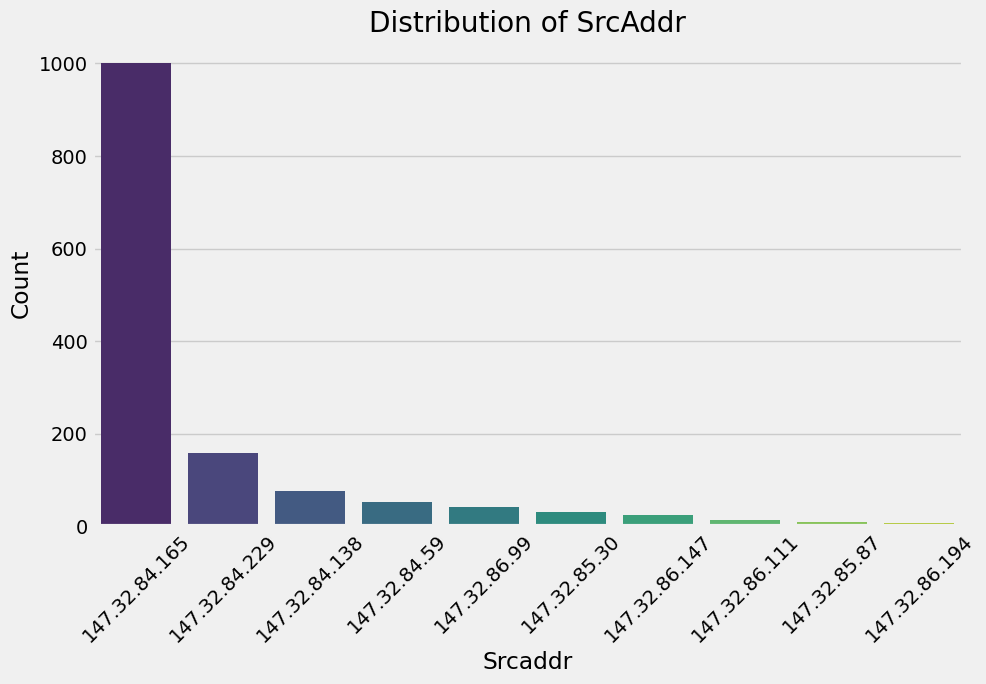

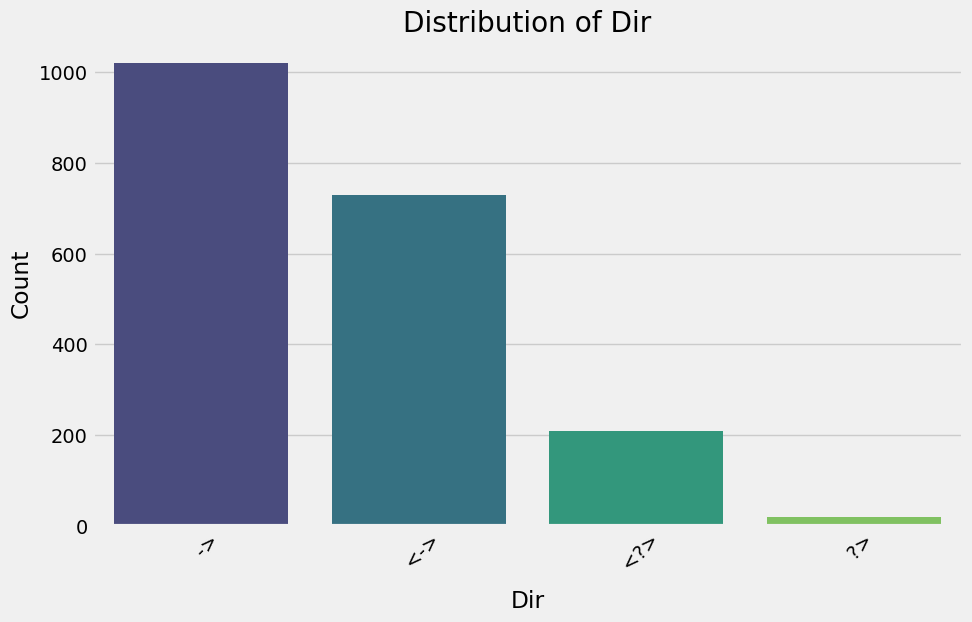

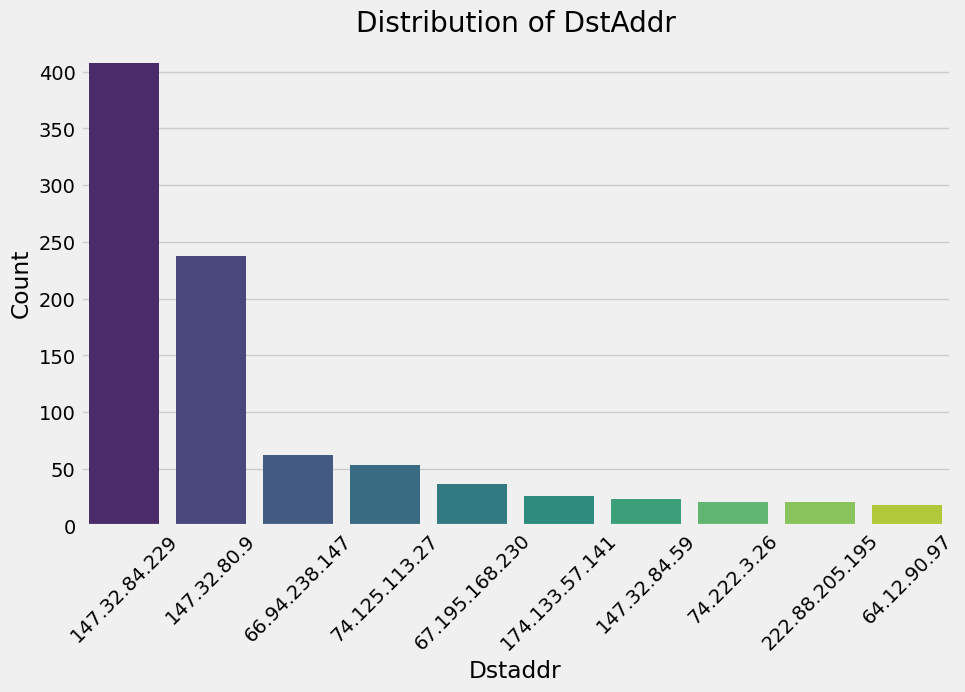

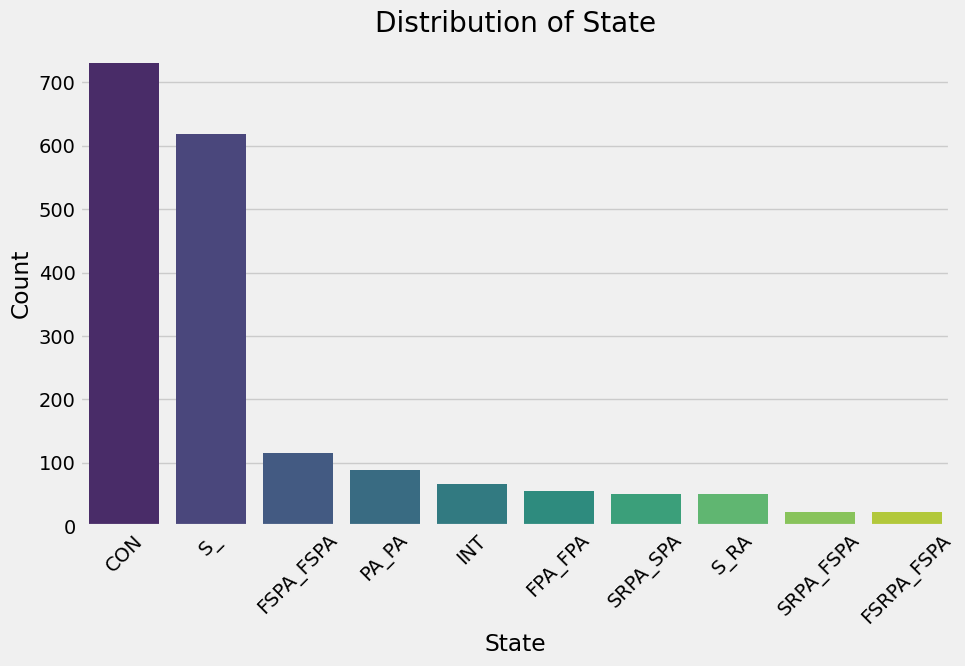

In [70]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_columns = ['Proto', 'SrcAddr', 'Dir', 'DstAddr','State']

# Plotting each categorical column
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', order=data[col].value_counts().head(10).index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print('\n\n')

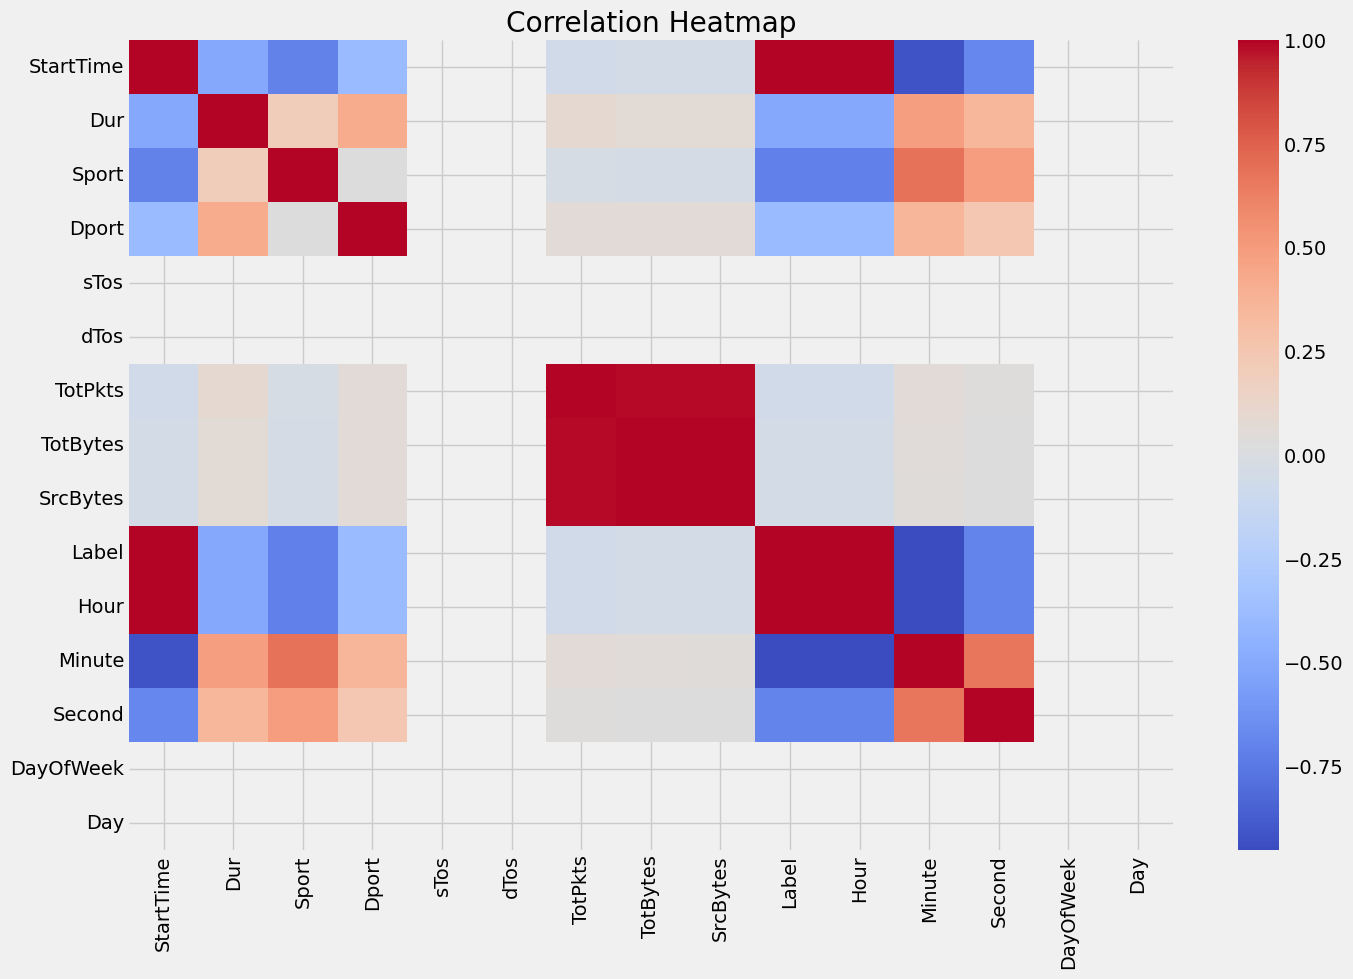

In [71]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [72]:
data[numerical_columns].corr()['Dur'].sort_values(ascending=False)

,Dur
Dur,1.000000
Minute,0.483567
Dport,0.420100
Second,0.352530
Sport,0.193129
TotPkts,0.086390
TotBytes,0.067320
SrcBytes,0.064389
StartTime,-0.507546
Hour,-0.509439


In [73]:
data[numerical_columns].corr()

,StartTime,Dur,Sport,Dport,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second,DayOfWeek,Day
StartTime,1.000000,-0.507546,-0.707276,-0.395293,NaN,NaN,-0.059833,-0.050050,-0.048149,0.995438,0.995438,-0.918372,-0.684269,NaN,NaN
Dur,-0.507546,1.000000,0.193129,0.420100,NaN,NaN,0.086390,0.067320,0.064389,-0.509439,-0.509439,0.483567,0.352530,NaN,NaN
Sport,-0.707276,0.193129,1.000000,0.025645,NaN,NaN,-0.022770,-0.029484,-0.031119,-0.711446,-0.711446,0.680123,0.496740,NaN,NaN
Dport,-0.395293,0.420100,0.025645,1.000000,NaN,NaN,0.058918,0.056742,0.057120,-0.393563,-0.393563,0.363714,0.252076,NaN,NaN
sTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dTos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotPkts,-0.059833,0.086390,-0.022770,0.058918,NaN,NaN,1.000000,0.988019,0.985888,-0.059983,-0.059983,0.056812,0.036743,NaN,NaN
TotBytes,-0.050050,0.067320,-0.029484,0.056742,NaN,NaN,0.988019,1.000000,0.999717,-0.050249,-0.050249,0.047822,0.031076,NaN,NaN
SrcBytes,-0.048149,0.064389,-0.031119,0.057120,NaN,NaN,0.985888,0.999717,1.000000,-0.048344,-0.048344,0.046027,0.029742,NaN,NaN
Label,0.995438,-0.509439,-0.711446,-0.393563,NaN,NaN,-0.059983,-0.050249,-0.048344,1.000000,1.000000,-0.951911,-0.692905,NaN,NaN


In [74]:
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
constant_columns

['sTos', 'dTos', 'DayOfWeek', 'Day']

In [75]:
data[constant_columns[0]].value_counts()

,count
sTos,
0.0,1978


In [76]:
data = data.drop(columns=constant_columns)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,TotBytes,SrcBytes,Label,Hour,Minute,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,875,413,0,9,46,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,135,75,0,9,46,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,120,60,0,9,46,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,180,120,0,9,46,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,2856,1596,0,9,46,53


In [77]:
# Calculate the correlation matrix
corr_matrix = data[numerical_columns].corr().abs()

# Select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
threshold = 0.8
high_corr_features = [column for column in upper.columns if any(upper[column] > threshold)]
high_corr_features

['TotBytes', 'SrcBytes', 'Label', 'Hour', 'Minute']

In [78]:
high_corr_features.remove('Label')
high_corr_features

['TotBytes', 'SrcBytes', 'Hour', 'Minute']

In [79]:
data = data.drop(columns=high_corr_features)
numerical_columns = [col for col in data.columns if col not in categorical_columns]
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,0,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,0,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,0,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,0,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,0,53


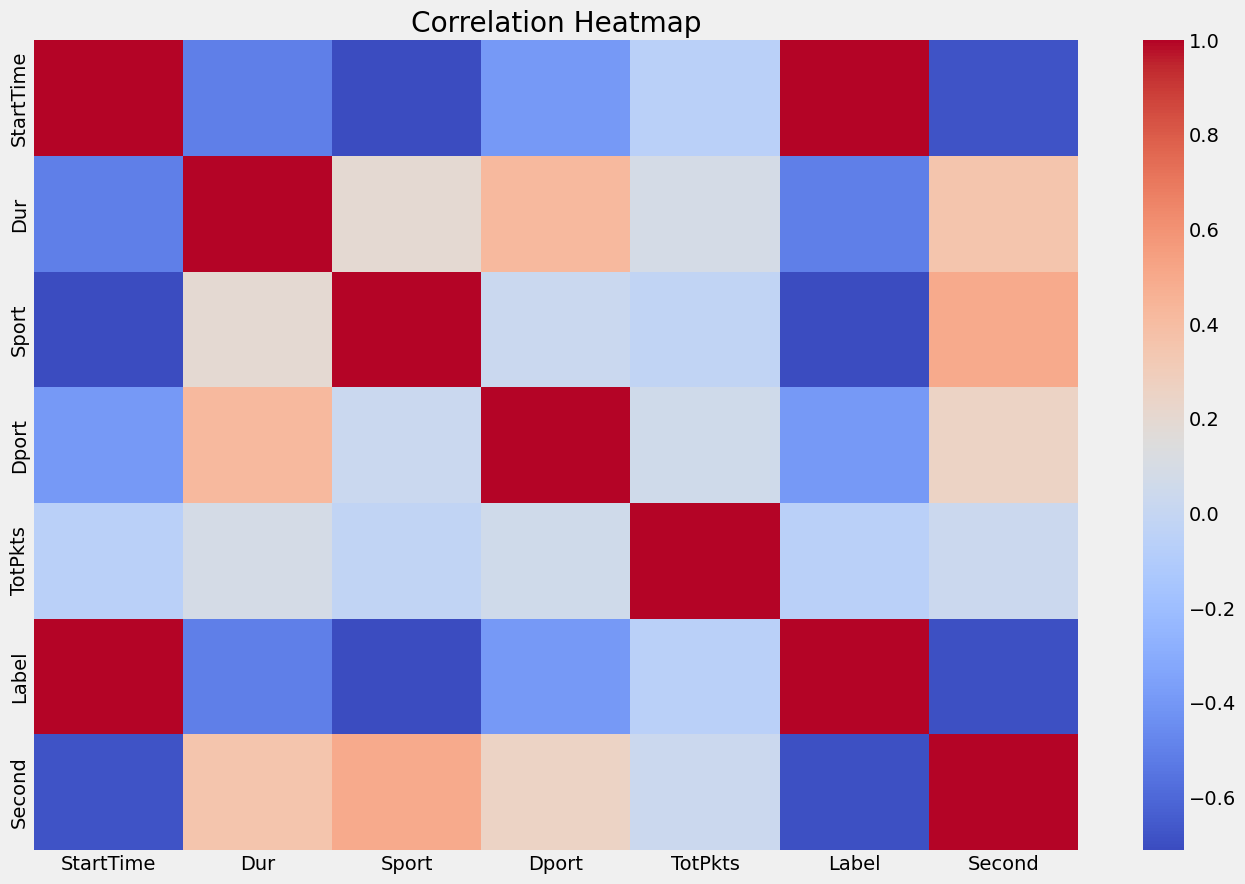

In [80]:
plt.figure(figsize=(15, 10))
sns.heatmap(data[numerical_columns].corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [81]:
data.head()

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,TotPkts,Label,Second
0,2011-08-10 09:46:53.047277,3550.182373,udp,212.50.71.179,39678,<->,147.32.84.229,13363,CON,12,0,53
1,2011-08-10 09:46:53.048843,0.000883,udp,84.13.246.132,28431,<->,147.32.84.229,13363,CON,2,0,53
2,2011-08-10 09:46:53.049895,0.000326,tcp,217.163.21.35,80,<?>,147.32.86.194,2063,FA_A,2,0,53
3,2011-08-10 09:46:53.053771,0.056966,tcp,83.3.77.74,32882,<?>,147.32.85.5,21857,FA_FA,3,0,53
4,2011-08-10 09:46:53.053937,3427.768066,udp,74.89.223.204,21278,<->,147.32.84.229,13363,CON,42,0,53


In [82]:
data.columns

Index(['StartTime', 'Dur', 'Proto', 'SrcAddr', 'Sport', 'Dir', 'DstAddr',
       'Dport', 'State', 'TotPkts', 'Label', 'Second'],
      dtype='object')

In [83]:
# Convert Source and Destination IP addresses to numerical values using hashing
data['SrcAddr'] = data['SrcAddr'].apply(lambda x: hash(x) % (2**16))
data['DstAddr'] = data['DstAddr'].apply(lambda x: hash(x) % (2**16))

# If Source Port or Destination Port have NaN values, fill them with a placeholder (e.g., 0 or -1)
data['SrcAddr'] = data['SrcAddr'].fillna(-1).astype(int)
data['DstAddr'] = data['DstAddr'].fillna(-1).astype(int)

In [84]:
data.dtypes

,0
StartTime,datetime64[ns]
Dur,float64
Proto,object
SrcAddr,int64
Sport,int64
Dir,object
DstAddr,int64
Dport,int64
State,object
TotPkts,int64


In [85]:
data = data.drop(columns=['StartTime'])
data = data.drop(columns=['SrcAddr','Sport'])

In [86]:
X = data.drop(columns=['Label'])
y = data[['Label']]

In [87]:
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,3550.182373,udp,<->,32039,13363,CON,12,53
1,0.000883,udp,<->,32039,13363,CON,2,53
2,0.000326,tcp,<?>,60067,2063,FA_A,2,53
3,0.056966,tcp,<?>,646,21857,FA_FA,3,53
4,3427.768066,udp,<->,32039,13363,CON,42,53


In [88]:
categorical_cols = ['Proto', 'State', 'Dir']

In [89]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X[categorical_cols] = le.fit_transform(X[categorical_cols])
X.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second
0,3550.182373,3.0,2.0,32039,13363,1.0,12,53
1,0.000883,3.0,2.0,32039,13363,1.0,2,53
2,0.000326,2.0,3.0,60067,2063,3.0,2,53
3,0.056966,2.0,3.0,646,21857,4.0,3,53
4,3427.768066,3.0,2.0,32039,13363,1.0,42,53


In [90]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [91]:
processed_data = pd.concat([X,y],axis=1)
processed_data.head()

,Dur,Proto,Dir,DstAddr,Dport,State,TotPkts,Second,Label
0,3550.182373,3.0,2.0,32039,13363,1.0,12,53,0
1,0.000883,3.0,2.0,32039,13363,1.0,2,53,0
2,0.000326,2.0,3.0,60067,2063,3.0,2,53,0
3,0.056966,2.0,3.0,646,21857,4.0,3,53,0
4,3427.768066,3.0,2.0,32039,13363,1.0,42,53,0


In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_data = scaler.fit_transform(processed_data)

In [93]:
processed_data

array([[ 2.30610462,  1.21501014,  0.82077815, ..., -0.06045801,
         0.6212719 , -1.01118489],
       [-0.52734983,  1.21501014,  0.82077815, ..., -0.06271857,
         0.6212719 , -1.01118489],
       [-0.52735028, -0.79611125,  1.69739757, ..., -0.06271857,
         0.6212719 , -1.01118489],
       ...,
       [-0.52067944, -0.79611125, -0.9324607 , ..., -0.06249252,
        -0.74979497,  0.98893883],
       [-0.52446946, -0.79611125, -0.9324607 , ..., -0.06113618,
        -0.74979497,  0.98893883],
       [-0.5204572 , -0.79611125, -0.9324607 , ..., -0.06249252,
        -0.74979497,  0.98893883]])

In [94]:
processed_data.shape

(1978, 9)

In [95]:
import tensorflow as tf
from tensorflow.keras import layers
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

latent_dim = 32  # Dimension of noise vector
clip_value = 0.01  # Weight clipping parameter

# Custom Wasserstein loss
def wasserstein_loss(y_true, y_pred):
    return tf.keras.backend.mean(y_true * y_pred)

# Generator remains similar
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(64, activation='relu', input_dim=latent_dim),
        layers.Dense(128, activation='relu'),
        # Output dimension matches processed_data; using sigmoid assuming data is scaled [0,1]
        layers.Dense(processed_data.shape[1], activation='sigmoid')
    ])
    return model

# Critic (formerly Discriminator) with linear output
def build_critic():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=processed_data.shape[1]),
        layers.Dense(64, activation='relu'),
        # No activation here (linear output) for Wasserstein loss
        layers.Dense(1)
    ])
    return model

# Initialize models
generator = build_generator()
critic = build_critic()


In [96]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,593 (45.29 KB)

 Trainable params: 11,593 (45.29 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
critic.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,601 (37.50 KB)

 Trainable params: 9,601 (37.50 KB)

 Non-trainable params: 0 (0.00 B)

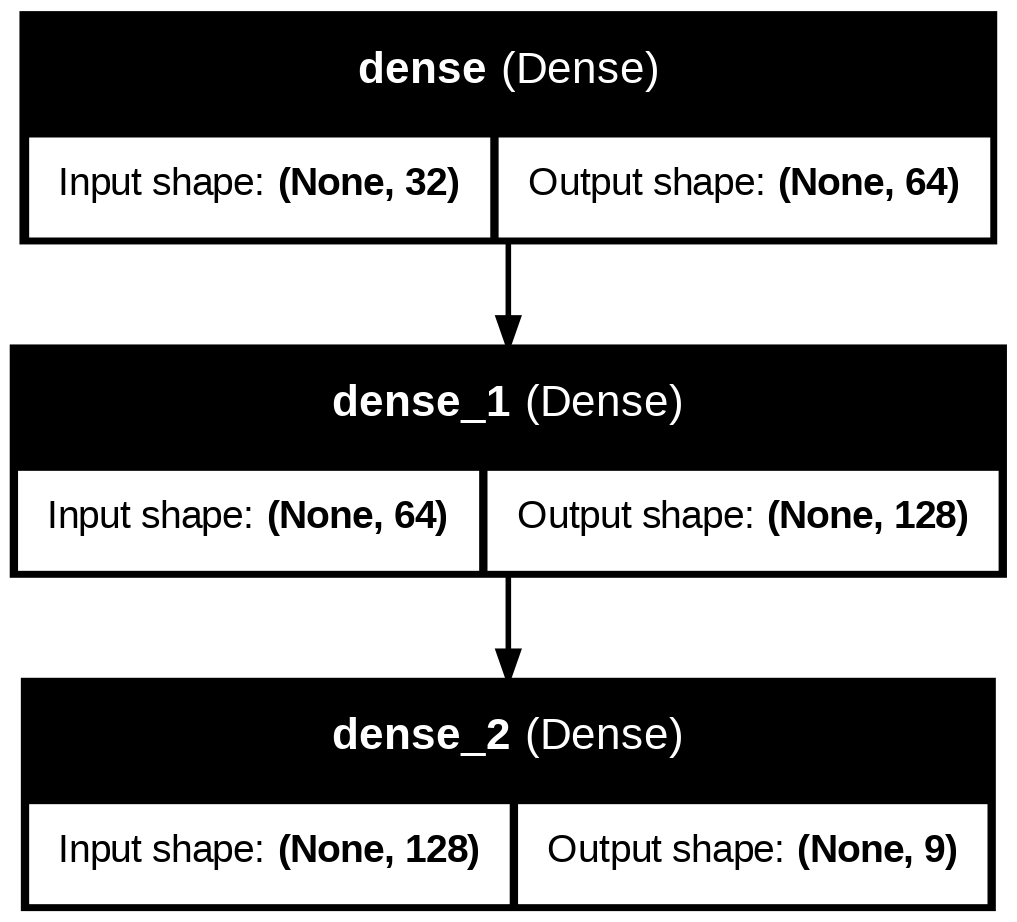

In [98]:
from tensorflow.keras.utils import plot_model
plot_model(generator, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

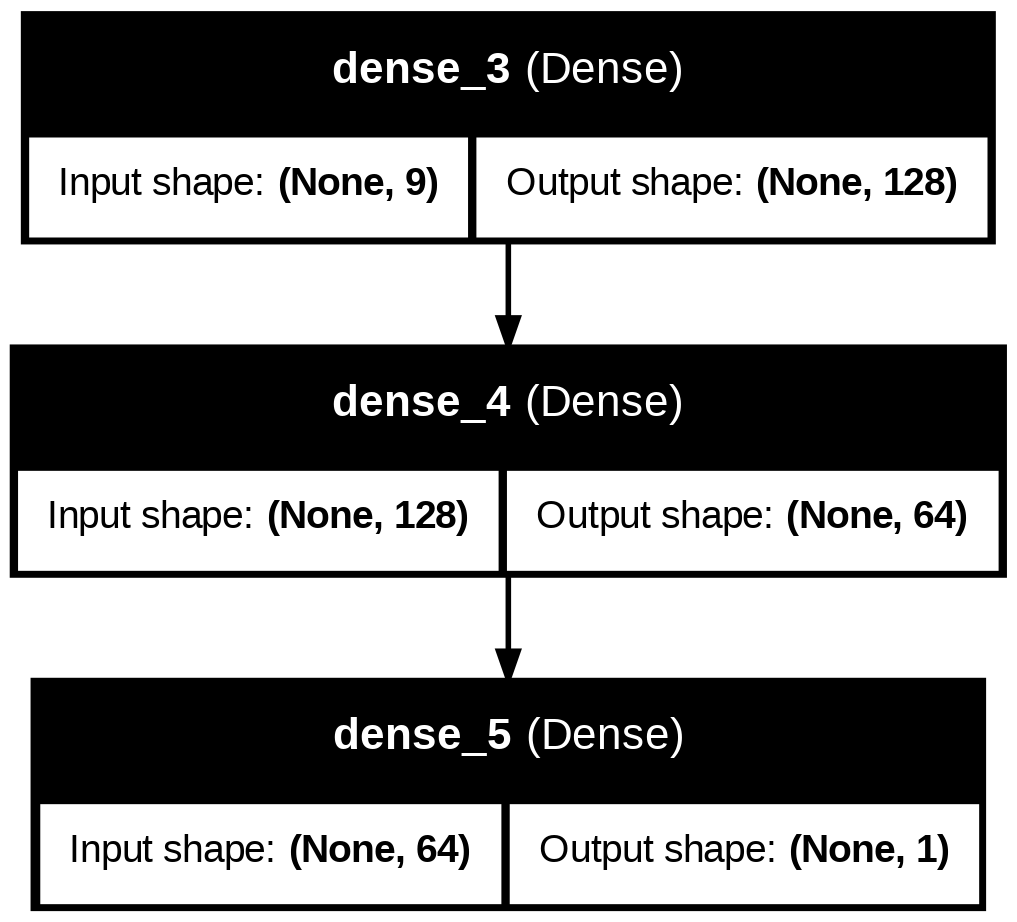

In [99]:
plot_model(critic, to_file='critic_plot.png', show_shapes=True, show_layer_names=True)

In [100]:
# Compile the critic using the Wasserstein loss and RMSprop optimizer
critic.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
                 loss=wasserstein_loss)

# Build the combined GAN model (Generator + Critic)
# Freeze the critic when training the generator
critic.trainable = False
gan_input = layers.Input(shape=(latent_dim,))
generated_data = generator(gan_input)
gan_output = critic(generated_data)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005),
            loss=wasserstein_loss)

In [101]:
# Training parameters
epochs = 10
batch_size = 32

In [102]:
# Dictionary to store metrics
metrics = {
    "epoch": [],
    "critic_loss": [],
    "g_loss": []
}

# Training loop with tqdm for progress bar
for epoch in tqdm(range(1, epochs + 1), desc="Training Progress"):
    # ---------------------
    #  Train the Critic
    # ---------------------
    # Sample a random batch of real data
    idx = np.random.randint(0, processed_data.shape[0], batch_size)
    real_data = processed_data[idx]

    # Generate a batch of fake data
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_data = generator.predict(noise)

    # For WGAN, label real data as -1 and fake data as 1
    real_labels = -np.ones((batch_size, 1))
    fake_labels = np.ones((batch_size, 1))

    # Train on real and fake data
    critic_loss_real = critic.train_on_batch(real_data, real_labels)
    critic_loss_fake = critic.train_on_batch(fake_data, fake_labels)
    critic_loss = 0.5 * (critic_loss_real + critic_loss_fake)

    # Weight clipping for the critic
    for layer in critic.layers:
        weights = layer.get_weights()
        weights = [np.clip(w, -clip_value, clip_value) for w in weights]
        layer.set_weights(weights)

    # ---------------------
    #  Train the Generator
    # ---------------------
    # Generator training: the generator tries to get the critic to output -1 on fake data.
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    valid_labels = -np.ones((batch_size, 1))
    g_loss = gan.train_on_batch(noise, valid_labels)

    # Save metrics
    metrics["epoch"].append(epoch)
    metrics["critic_loss"].append(critic_loss)
    metrics["g_loss"].append(g_loss)

    # Optionally print progress
    print(f"Epoch {epoch} - Critic Loss: {critic_loss:.4f}, Generator Loss: {g_loss:.4f}")

Training Progress:   0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


Training Progress:  10%|█         | 1/10 [00:04<00:40,  4.52s/it]

Epoch 1 - Critic Loss: -0.1388, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Epoch 2 - Critic Loss: -0.0624, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


Training Progress:  30%|███       | 3/10 [00:04<00:08,  1.23s/it]

Epoch 3 - Critic Loss: -0.0392, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 4 - Critic Loss: -0.0286, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training Progress:  50%|█████     | 5/10 [00:04<00:03,  1.57it/s]

Epoch 5 - Critic Loss: -0.0226, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Epoch 6 - Critic Loss: -0.0186, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training Progress:  70%|███████   | 7/10 [00:04<00:01,  2.52it/s]

Epoch 7 - Critic Loss: -0.0158, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Epoch 8 - Critic Loss: -0.0138, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


Training Progress:  90%|█████████ | 9/10 [00:05<00:00,  3.63it/s]

Epoch 9 - Critic Loss: -0.0122, Generator Loss: 0.0001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


Training Progress: 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]

Epoch 10 - Critic Loss: -0.0109, Generator Loss: 0.0001


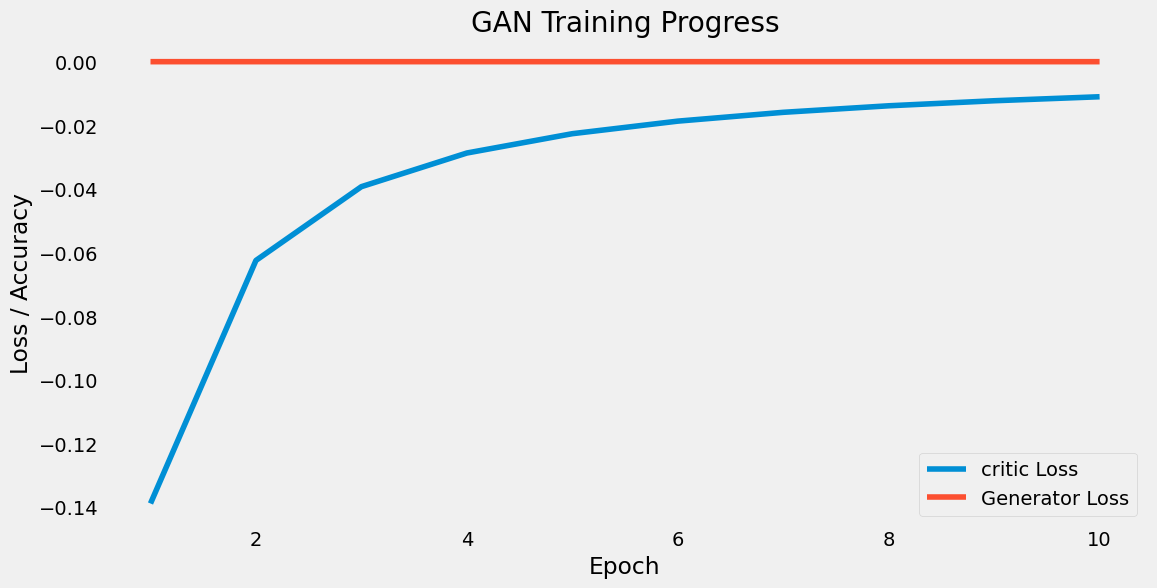

In [103]:
# Plot metrics
plt.figure(figsize=(12, 6))
plt.plot(metrics["epoch"], metrics["critic_loss"], label="critic Loss")
plt.plot(metrics["epoch"], metrics["g_loss"], label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.title("GAN Training Progress")
plt.legend()
plt.grid()
plt.show()

In [104]:
noise = np.random.normal(0, 1, (processed_data.shape[0], latent_dim))
synthetic_data = generator.predict(noise)
synthetic_data = scaler.inverse_transform(synthetic_data)
synthetic_data = processed_data
print("Synthetic Data:")
print(synthetic_data)

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
Synthetic Data:
[[ 2.30610462  1.21501014  0.82077815 ... -0.06045801  0.6212719
  -1.01118489]
 [-0.52734983  1.21501014  0.82077815 ... -0.06271857  0.6212719
  -1.01118489]
 [-0.52735028 -0.79611125  1.69739757 ... -0.06271857  0.6212719
  -1.01118489]
 ...
 [-0.52067944 -0.79611125 -0.9324607  ... -0.06249252 -0.74979497
   0.98893883]
 [-0.52446946 -0.79611125 -0.9324607  ... -0.06113618 -0.74979497
   0.98893883]
 [-0.5204572  -0.79611125 -0.9324607  ... -0.06249252 -0.74979497
   0.98893883]]


In [105]:
synthetic_data.shape

(1978, 9)

In [106]:
X = synthetic_data[:,:-1]
y = synthetic_data[:,-1]

In [107]:
X.shape

(1978, 8)

In [108]:
y.shape

(1978,)

In [109]:
y = np.where(y >= 0.5, 1, 0)
y

array([0, 0, 0, ..., 1, 1, 1])

In [110]:
np.unique(y)

array([0, 1])

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [112]:
X_train.shape,X_test.shape

((1582, 8), (396, 8))

In [113]:
y_train.shape,y_test.shape

((1582,), (396,))

In [114]:
X_train.shape,X_test.shape

((1582, 8), (396, 8))

In [115]:
label = np.unique(y).tolist()
label

[0, 1]

In [116]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:

Training time (sec) = 1.7386400699615479
Prediction time (sec) = 0.0004622936248779297

Training score = 0.9047906010230179
Testing score = 0.9319897959183674

No of misclassified for class 0 (test data) = 10
No of misclassified for class 1 (test data) = 17
Total no of misclassified points (test data) = 27
Total % of misclassified points (test data) = 0.06818181818181818

Training log_loss = 0.1941327506360051
Testing log_loss = 0.16672850945704212

Confusion matrix:


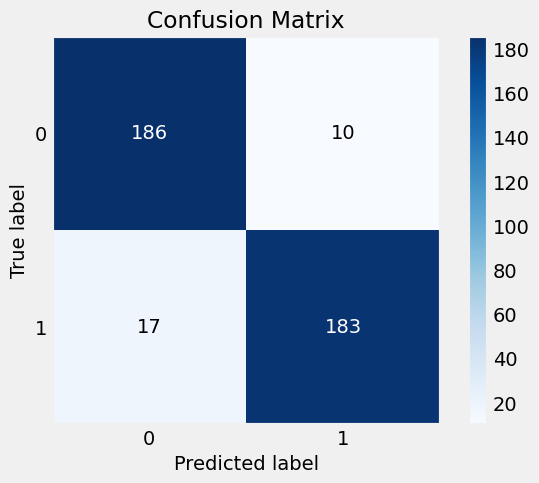

Classification report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       196
           1       0.95      0.92      0.93       200

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396

**************************************************************************


In [117]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:

Training time (sec) = 0.004113674163818359
Prediction time (sec) = 0.00028061866760253906

Training score = 0.9080019181585677
Testing score = 0.9320408163265306

No of misclassified for class 0 (test data) = 9
No of misclassified for class 1 (test data) = 18
Total no of misclassified points (test data) = 27
Total % of misclassified points (test data) = 0.06818181818181818

Confusion matrix:


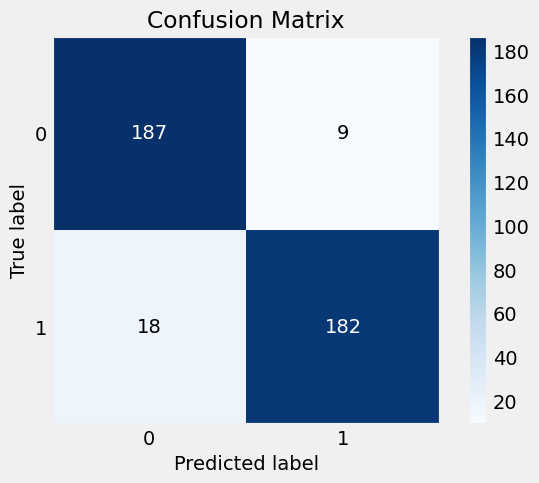

Classification report:

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       196
           1       0.95      0.91      0.93       200

    accuracy                           0.93       396
   macro avg       0.93      0.93      0.93       396
weighted avg       0.93      0.93      0.93       396

**************************************************************************


In [118]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 0.004441738128662109
Prediction time (sec) = 0.0002543926239013672

Training score = 1.0
Testing score = 0.9924489795918368

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 2
Total no of misclassified points (test data) = 3
Total % of misclassified points (test data) = 0.007575757575757576

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.2730579802205847

Confusion matrix:


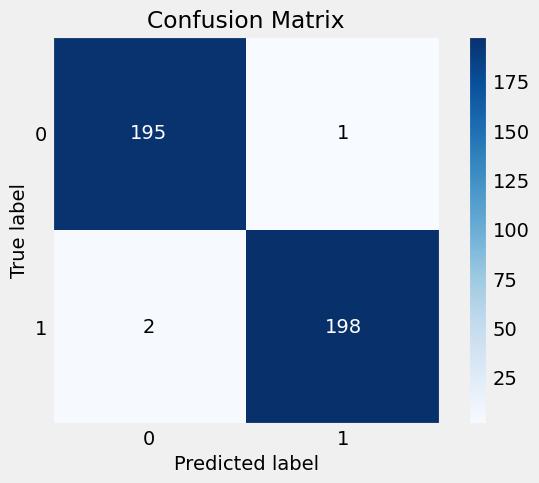

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       0.99      0.99      0.99       200

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

**************************************************************************


In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 0.14766311645507812
Prediction time (sec) = 0.009991884231567383

Training score = 1.0
Testing score = 0.9899489795918368

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 3
Total no of misclassified points (test data) = 4
Total % of misclassified points (test data) = 0.010101010101010102

Training log_loss = 2.2204460492503136e-16
Testing log_loss = 0.11032734269927488

Confusion matrix:


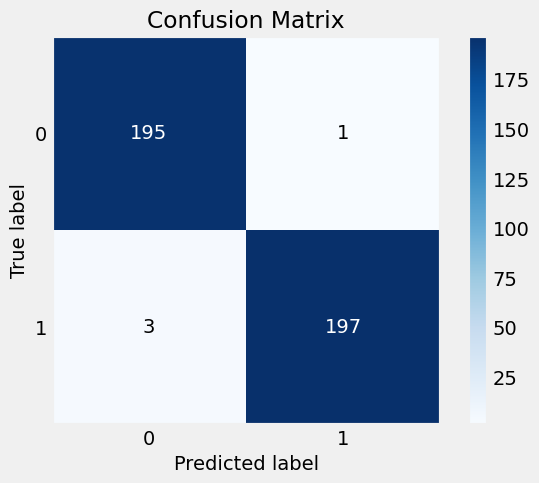

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       196
           1       0.99      0.98      0.99       200

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

**************************************************************************


In [120]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:

Training time (sec) = 0.18819522857666016
Prediction time (sec) = 0.00859212875366211

Training score = 1.0
Testing score = 0.9924489795918368

No of misclassified for class 0 (test data) = 1
No of misclassified for class 1 (test data) = 2
Total no of misclassified points (test data) = 3
Total % of misclassified points (test data) = 0.007575757575757576

Training log_loss = 0.011545601898177407
Testing log_loss = 0.11506667016291565

Confusion matrix:


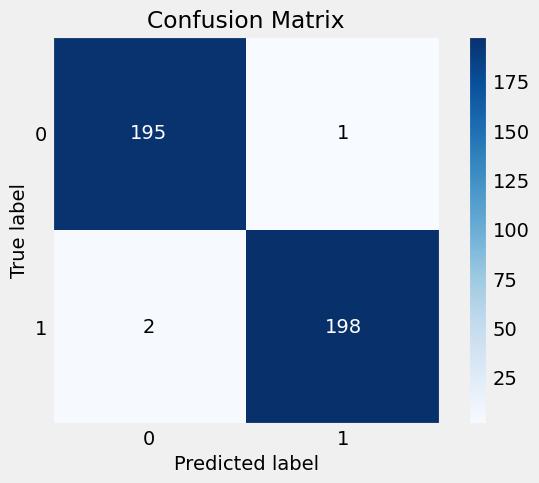

Classification report:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       196
           1       0.99      0.99      0.99       200

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

**************************************************************************


In [121]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

In [122]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results]
s2=['LR','LSVC','DTC','ETC','RFC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.904791,0.931990,27,0.068182,1.941328e-01,0.166729,1.738640,0.000462
1,LSVC,0.908002,0.932041,27,0.068182,NaN,NaN,0.004114,0.000281
2,DTC,1.000000,0.992449,3,0.007576,2.220446e-16,0.273058,0.004442,0.000254
3,ETC,1.000000,0.989949,4,0.010101,2.220446e-16,0.110327,0.147663,0.009992
4,RFC,1.000000,0.992449,3,0.007576,1.154560e-02,0.115067,0.188195,0.008592


In [123]:
scaler

StandardScaler()

In [124]:
rfc

RandomForestClassifier(class_weight='balanced')

In [125]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(scaler, rfc)
joblib.dump(pipeline, 'rfc_pipeline.joblib')

['rfc_pipeline.joblib']

In [126]:
X

array([[ 2.30610462,  1.21501014,  0.82077815, ..., -1.08127716,
        -0.06045801,  0.6212719 ],
       [-0.52734983,  1.21501014,  0.82077815, ..., -1.08127716,
        -0.06271857,  0.6212719 ],
       [-0.52735028, -0.79611125,  1.69739757, ..., -1.00225822,
        -0.06271857,  0.6212719 ],
       ...,
       [-0.52067944, -0.79611125, -0.9324607 , ...,  1.17076272,
        -0.06249252, -0.74979497],
       [-0.52446946, -0.79611125, -0.9324607 , ...,  1.0522343 ,
        -0.06113618, -0.74979497],
       [-0.5204572 , -0.79611125, -0.9324607 , ...,  1.17076272,
        -0.06249252, -0.74979497]])

In [127]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [128]:
np.save('synthetic_X.npy', X)
np.save('synthetic_y.npy', y)

In [129]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [130]:
!rm -rf /content/drive/MyDrive/save_data && mkdir -p /content/drive/MyDrive/save_data
!mv /content/synthetic_X.npy /content/drive/MyDrive/save_data/.
!mv /content/synthetic_y.npy /content/drive/MyDrive/save_data/.